<a href="https://colab.research.google.com/github/pranayreddy713/Alfido-Tech/blob/main/TASK_NO_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the **libraries** and **packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


Using **sep="::"** we seperate the data into different columns

In [ ]:
df_movie=pd.read_csv('/content/movies.dat',sep="::",engine='python')
df_movie.dropna(inplace=True)
df_movie.head()

,MovieIDs,MovieName,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


To find out how many rows and columns are in our DataFrame "movies"

In [ ]:
df_movie.shape

(3882, 3)

To check the missing values in the dataframe

In [ ]:
df_movie.isna().sum()

MovieIDs     0
MovieName    0
Genre        0
dtype: int64

Downloading ratings dataset

In [ ]:
df_ratings=pd.read_csv("/content/ratings.dat", sep="::", engine="python")
df_ratings.dropna(inplace=True)
df_ratings.head(10)

,UserId,MovieID,Ratings,Timestamp
0,1,1193,5.0,978300760.0
1,1,661,3.0,978302109.0
2,1,914,3.0,978301968.0
3,1,3408,4.0,978300275.0
4,1,2355,5.0,978824291.0
5,1,1197,3.0,978302268.0
6,1,1287,5.0,978302039.0
7,1,2804,5.0,978300719.0
8,1,594,4.0,978302268.0
9,1,919,4.0,978301368.0


To find out how many rows and columns are in our DataFrame "ratings"

In [ ]:
df_ratings.shape

(176218, 4)

To check the missing values in the dataframe "ratings"

In [ ]:
df_ratings.isna().sum()

UserId     0
MovieID    0
Ratings    0
Unknown    0
dtype: int64

Loading the User Data given by alfido-Tech

In [ ]:
df_users=pd.read_csv("/content/users.dat", sep="::", engine="python")
df_users.dropna(inplace=True)
df_users.head(10)


,UserID,Gender,Age,Occupation,Zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


To find out how many rows and columns are in your DataFrame "users"

In [ ]:
df_users.shape

(6040, 5)

To check the missing values in the dataframe "users"

In [ ]:
df_users.isna().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zipcode       0
dtype: int64

Label encoding is used to convert categorical data into a format that **machine** **learning** **algorithms** can work

In [ ]:
labelencoder = LabelEncoder()

df_users['Gender']= labelencoder.fit_transform(df_users['Gender'])

df_users.head()

,UserID,Gender,Age,Occupation,Zipcode
0,1,0,1,10,48067
1,2,1,56,16,70072
2,3,1,25,15,55117
3,4,1,45,7,02460
4,5,1,25,20,55455


Concatenating the datasets for combining the 3 datasets of movies,users and rating

In [ ]:
df_data=pd.concat([df_movie,df_ratings,df_users],axis=1)
df_data.head(10)

,MovieIDs,MovieName,Genre,UserId,MovieID,Ratings,Timestamp,UserID,Gender,Age,Occupation,Zipcode
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5.0,978300760.0,1.0,0.0,1.0,10.0,48067
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3.0,978302109.0,2.0,1.0,56.0,16.0,70072
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3.0,978301968.0,3.0,1.0,25.0,15.0,55117
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4.0,978300275.0,4.0,1.0,45.0,7.0,02460
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5.0,978824291.0,5.0,1.0,25.0,20.0,55455
5,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3.0,978302268.0,6.0,0.0,50.0,9.0,55117
6,7.0,Sabrina (1995),Comedy|Romance,1,1287,5.0,978302039.0,7.0,1.0,35.0,1.0,06810
7,8.0,Tom and Huck (1995),Adventure|Children's,1,2804,5.0,978300719.0,8.0,1.0,25.0,12.0,11413
8,9.0,Sudden Death (1995),Action,1,594,4.0,978302268.0,9.0,1.0,25.0,17.0,61614
9,10.0,GoldenEye (1995),Action|Adventure|Thriller,1,919,4.0,978301368.0,10.0,0.0,35.0,1.0,95370


To find out how many rows and columns are in concatinated datset

In [ ]:
df_data.shape

(218506, 12)

Removing the unwanted columns

In [ ]:
df2=df_data.drop(["Occupation","Zipcode","Timestamp"],axis=1)
df2.head()

,MovieIDs,MovieName,Genre,UserId,MovieID,Ratings,UserID,Gender,Age
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5.0,1.0,0.0,1.0
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3.0,2.0,1.0,56.0
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3.0,3.0,1.0,25.0
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4.0,4.0,1.0,45.0
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5.0,5.0,1.0,25.0


To check the missing values in the dataframe2(df2)

In [ ]:
df2.isna().sum()

MovieIDs     214623
MovieName    214623
Genre        214623
UserId            0
MovieID           0
Ratings           0
UserID       212466
Gender       212466
Age          212466
dtype: int64

Handling the missing values

In [ ]:
df_final=df2.dropna()

In [ ]:
df_final.shape

(3883, 9)

Using data visulaisation we can represent the processed data

<Axes: xlabel='Gender', ylabel='count'>

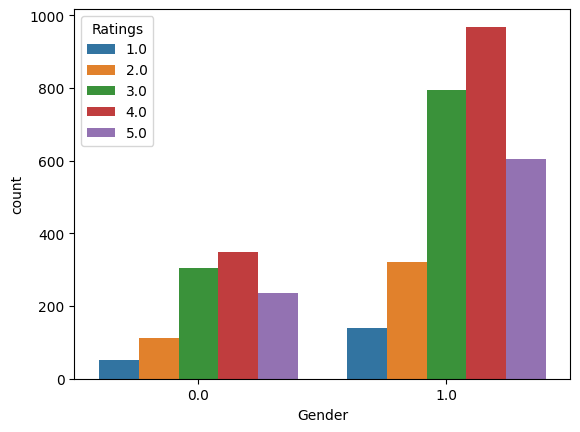

In [ ]:
sns.countplot(x=df_final['Gender'],hue=df_final['Ratings'])

Text(0.5, 0, 'Ratings')

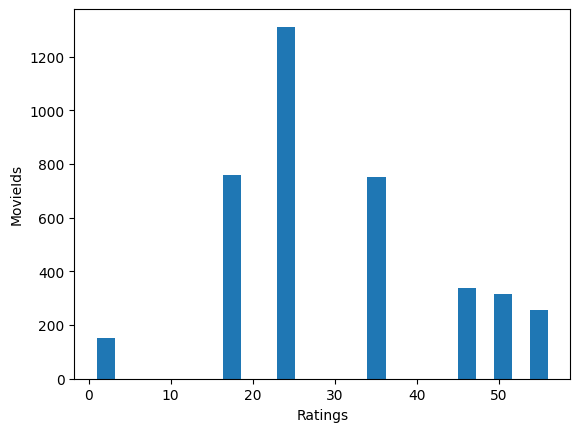

In [ ]:
df_final.Age.plot.hist(bins=25)
plt.ylabel("MovieIds")
plt.xlabel("Ratings")

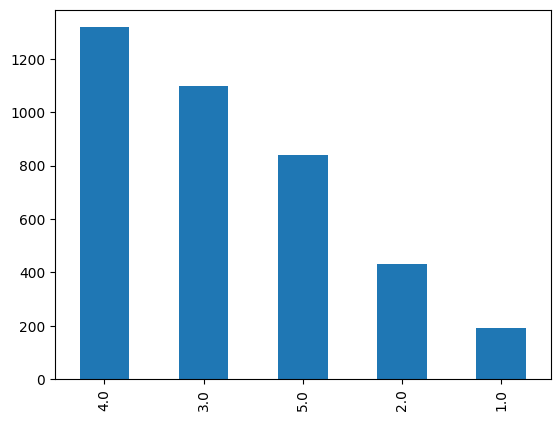

In [ ]:
df_final['Ratings'].value_counts().plot(kind='bar')
plt.show()

Text(0, 0.5, 'Ratings')

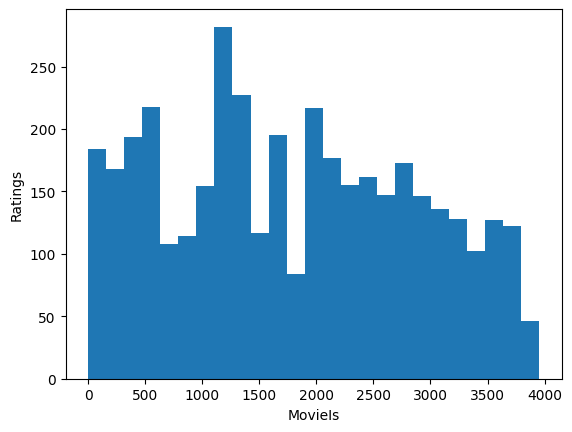

In [ ]:
df_final['MovieID'].plot.hist(bins=25)
plt.xlabel("MovieIs")
plt.ylabel("Ratings")

Text(0, 0.5, 'Age')

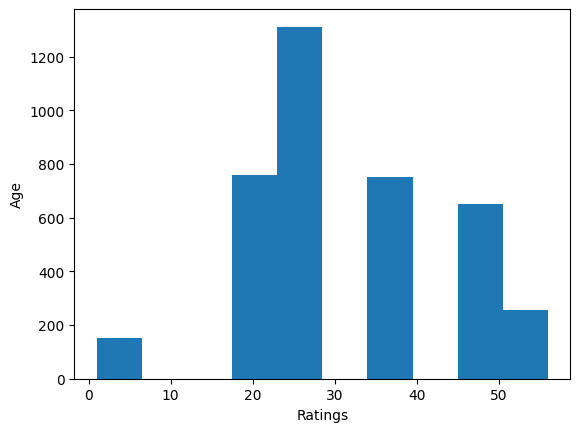

In [ ]:
df_final['Age'].plot.hist(bins=10)
plt.xlabel("Ratings")
plt.ylabel("Age")


<Axes: xlabel='Age', ylabel='count'>

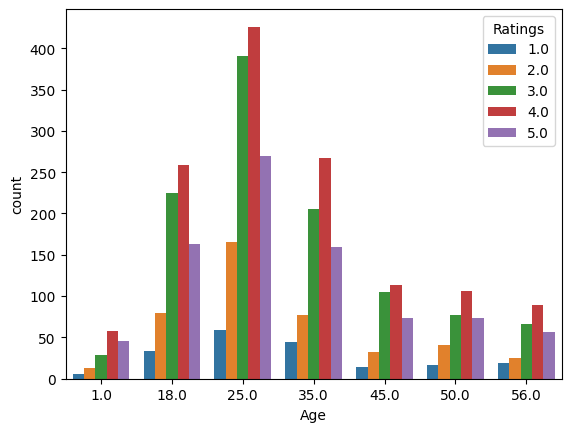

In [ ]:
sns.countplot(x=df_final['Age'],hue=df_final['Ratings'])

Final dataset

In [ ]:
df_final.head()

,MovieIDs,MovieName,Genre,UserId,MovieID,Ratings,UserID,Gender,Age
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5.0,1.0,0.0,1.0
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3.0,2.0,1.0,56.0
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3.0,3.0,1.0,25.0
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4.0,4.0,1.0,45.0
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5.0,5.0,1.0,25.0


In [ ]:
input=df_final.drop(['Ratings','MovieName','Genre','MovieIDs'], axis=1)
target=df_final['Ratings']

In [ ]:
target.head()

0    5.0
1    3.0
2    3.0
3    4.0
4    5.0
Name: Ratings, dtype: float64

In [ ]:
input.head()

,UserId,MovieID,UserID,Gender,Age
0,1,1193,1.0,0.0,1.0
1,1,661,2.0,1.0,56.0
2,1,914,3.0,1.0,25.0
3,1,3408,4.0,1.0,45.0
4,1,2355,5.0,1.0,25.0


Training the model using the logistic regression

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(input)
scaled_df = pd.DataFrame(scaled_data,
                         columns=input.columns)
scaled_df.head()

,UserId,MovieID,UserID,Gender,Age
0,0.0,0.301696,0.000000,0.0,0.000000
1,0.0,0.167046,0.000258,1.0,1.000000
2,0.0,0.231081,0.000515,1.0,0.436364
3,0.0,0.862313,0.000773,1.0,0.800000
4,0.0,0.595799,0.001030,1.0,0.436364


In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(input,target,test_size=0.3)

In [ ]:
print(Y_train)
print(Y_test)

1603    4.0
2822    3.0
3003    4.0
1911    5.0
2719    3.0
       ... 
3484    3.0
3694    2.0
3805    5.0
3038    4.0
2647    2.0
Name: Ratings, Length: 2718, dtype: float64
1154    3.0
1690    1.0
334     2.0
3115    1.0
2438    4.0
       ... 
959     5.0
3490    3.0
1565    4.0
3660    3.0
1950    5.0
Name: Ratings, Length: 1165, dtype: float64


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
LogisticRegression()

LogisticRegression()

In [ ]:
X_test = np.array(X_test)

**Model** **prediction**

In [ ]:
model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([4., 4., 4., ..., 4., 4., 4.])